# Importing the Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
%matplotlib inline

# Pre-processing

### Loading the Cifar10 database

In [2]:
# Setting the name of the classes that will be predicted
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# Loading the database
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


### Image normalization

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
X_train = X_train / 255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test = X_test / 255.0

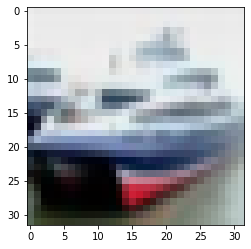

In [8]:
plt.imshow(X_test[1])

## Building the Convolutional Neural Network

### Defining the model

In [9]:
model = tf.keras.models.Sequential()


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

### Added the first convolution layer

Hyper-parameters of the convolution layer:
- filters: 32
- kernel_size (kernel size): 3
- padding: same
- activation function: relu
- input_shape (input layer): (32, 32, 3)

In [10]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second convolution layer and the max-pooling layer

Hyper-parameters of the convolution layer:
- filters: 32
- kernel_size (kernel size):3
- padding: same
- activation function: relu

Max-pooling layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [11]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [12]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third convolution layer

Hyper-parameters of the convolution layer:

     filters: 64
     kernel_size:3
     padding: same
     activation: relu


In [13]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

### Adding the fourth convolution layer and the max pooling layer

Hyper-parameters of the convolution layer:

     filters: 64
     kernel_size:3
     padding: same
     activation: relu

Hyper-parameters of the max pooling layer:

     pool_size: 2
     strides: 2
     padding: valid

In [14]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [15]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the flattening layer

In [16]:
model.add(tf.keras.layers.Flatten())

### Adding the first dense (fully-connected) layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation function: relu

In [17]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the output layer

Output layer hyper-parameters:

  - units/neurons: 10 (number of classes)
  - activation: softmax

In [18]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

### Compiling the model

#### sparse_categorical_accuracy

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [20]:
# 0 0 0 1 0 0 0 0 0 0
y_test[0]

array([3], dtype=uint8)

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [22]:
model.fit(X_train, y_train, epochs=5)

2021-11-16 11:18:27.479410: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.3804 - sparse_categorical_accuracy: 0.4996
Epoch 2/5
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9149 - sparse_categorical_accuracy: 0.6754
Epoch 3/5
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7311 - sparse_categorical_accuracy: 0.7429
Epoch 4/5
1563/1563 [==============================] - 76s 49ms/step - loss: 0.6019 - sparse_categorical_accuracy: 0.7879
Epoch 5/5
1563/1563 [==============================] - 81s 52ms/step - loss: 0.4967 - sparse_categorical_accuracy: 0.8258


### Evaluating the model

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.7747 - sparse_categorical_accuracy: 0.7376


In [24]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7376000285148621


In [25]:
test_loss

0.7747055888175964

# If you find this notebook useful, support with an upvote 👍